## Runs DE on different clusters. Also runs DE within each cluster for each condition.
Does this over each donor and combined

In [1]:
# se_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/SE.rds"
# cluster_labels_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/results/chip_b1_lineage_markers.txt"

se_f = "/mnt/md0/isshamie/Projects/Mito_Trace/output/aggregate/CHIP_aggr/v04_no_ChA1/data/annotation/gff_A2//mergedSamples/allSamples.integrated.rds"
cluster_labels_f = "/mnt/md0/isshamie/Projects/Mito_Trace/output/aggregate/CHIP_aggr/v04_no_ChA1/results/aggregate_lineage_markers_order.txt"

is_rds = TRUE


In [2]:
library("Seurat")
library(ggplot2)

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”


In [3]:
outdir <- dirname(se_f)

In [4]:
if(is_rds){
    se <- readRDS(se_f)
    meta <- se[[]]
    
}else{
    meta <- as.data.frame(readr::read_tsv(se_f)) # %>% tidyr::unite(barcode)
}     

meta


#file.path(indir, paste0("allSamples.integrated.rds")))


,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5127,5127,25798,3956,111,95,1643,4740,15253,⋯,0.46,30.59726,0,High,NS < 4,11,11,12.32418,8908,5567
cd34norm_Flt3l_AAACGAAAGCGATACG-1,Flt3l,2309,2309,18340,2478,78,92,794,9325,5573,⋯,0.62,38.07644,0,High,NS < 4,2,2,11.17368,3006,2472
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,Flt3l,4232,4232,28417,4398,132,122,1771,10224,11770,⋯,0.30,32.71878,0,High,NS < 4,6,6,12.04746,6521,4620
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1510,1510,12018,1524,60,45,585,5688,4116,⋯,0.06,32.28863,0,High,NS < 4,11,11,10.56129,2356,1996
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3199,3199,37690,3034,82,125,1680,24974,7795,⋯,0.69,37.78063,0,High,NS < 4,6,6,11.64386,4275,3340
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1463,1463,9381,1416,44,50,547,3616,3708,⋯,0.22,34.49299,0,High,NS < 4,2,2,10.51570,2150,1864
cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3053,3053,30421,5698,112,157,1762,14034,8658,⋯,0.63,31.17348,0,High,NS < 4,7,7,11.57648,5338,3881
cd34norm_Flt3l_AAACGAACACGATATC-1,Flt3l,2575,2575,15245,1960,89,32,737,5330,7097,⋯,0.11,32.04171,0,High,NS < 4,4,4,11.33092,4225,3237
cd34norm_Flt3l_AAACGAACACTTACAG-1,Flt3l,10684,10684,48515,10680,240,158,2715,12096,22626,⋯,0.36,47.67966,0,High,NS < 4,14,14,13.38330,13471,7325


In [5]:
if ((cluster_labels_f != "") & (cluster_labels_f != "FALSE") & (cluster_labels_f != "None" )){
    print("Adding label information")
    clusters <- read.csv(cluster_labels_f, header = FALSE)
    row.names(clusters) = clusters$V1
    meta$cluster_labels <- sapply(meta$seurat_clusters, function(x) (clusters[as.character(x), "V2"]) )
}else{
    meta$cluster_labels <- meta$seurat_clusters
}


[1] "Adding label information"


In [6]:
all(row.names(meta)==row.names(se[[]]))

[1] TRUE

In [7]:
group_cl <- function(x){
    return(trimws(gsub('[0-9]+', '', x), which = c("both")))
    }
meta$cluster_groups = sapply(meta$cluster_labels, group_cl)

In [8]:
se$cluster_labels <- meta$cluster_labels
se$cluster_groups <- meta$cluster_groups

Loading required package: Signac



In [9]:
head(meta)

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA,cluster_labels,cluster_groups
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>,<chr>,<chr>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5127,5127,25798,3956,111,95,1643,4740,15253,⋯,0,High,NS < 4,11,11,12.32418,8908,5567,Neutrophil 2,Neutrophil
cd34norm_Flt3l_AAACGAAAGCGATACG-1,Flt3l,2309,2309,18340,2478,78,92,794,9325,5573,⋯,0,High,NS < 4,2,2,11.17368,3006,2472,HSPC 2,HSPC
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,Flt3l,4232,4232,28417,4398,132,122,1771,10224,11770,⋯,0,High,NS < 4,6,6,12.04746,6521,4620,MkP 1,MkP
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1510,1510,12018,1524,60,45,585,5688,4116,⋯,0,High,NS < 4,11,11,10.56129,2356,1996,Neutrophil 2,Neutrophil
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3199,3199,37690,3034,82,125,1680,24974,7795,⋯,0,High,NS < 4,6,6,11.64386,4275,3340,MkP 1,MkP
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1463,1463,9381,1416,44,50,547,3616,3708,⋯,0,High,NS < 4,2,2,10.51570,2150,1864,HSPC 2,HSPC


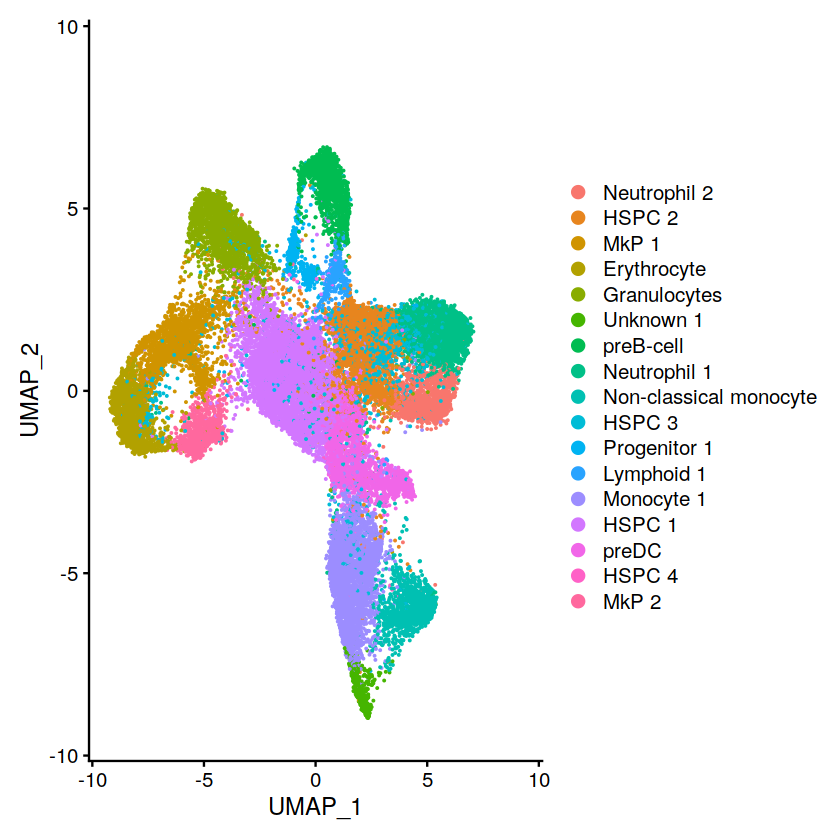

In [10]:
## plot with labels
Idents(se) <- se$cluster_labels
coord = max(max(Embeddings(se[["umap"]])), abs(min(Embeddings(se[["umap"]]))))
DimPlot(se, ) + 
    xlim(-1*coord-0.01,coord+0.01) +
    ylim(-1*coord-0.01,coord+0.01) 

ggsave(file.path(outdir, "umap_cluster_labels.pdf"), width=12, height=8,units='in' )

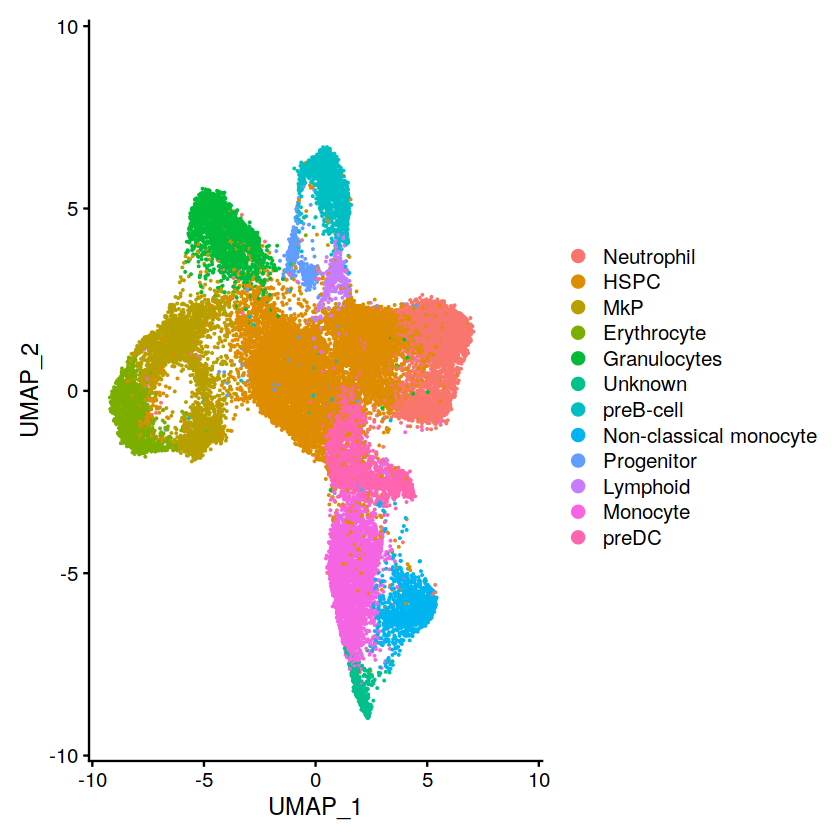

In [11]:
## plot with labels
Idents(se) <- se$cluster_groups
coord = max(max(Embeddings(se[["umap"]])), abs(min(Embeddings(se[["umap"]]))))
DimPlot(se, ) + 
    xlim(-1*coord-0.01,coord+0.01) +
    ylim(-1*coord-0.01,coord+0.01) 

ggsave(file.path(outdir, "umap_cluster_labels_groups.pdf"), width=12, height=8,units='in' )

In [12]:
write.table(meta,file=file.path(dirname(se_f), "se_cells_meta_labels.tsv"), sep = "\t", quote=FALSE)

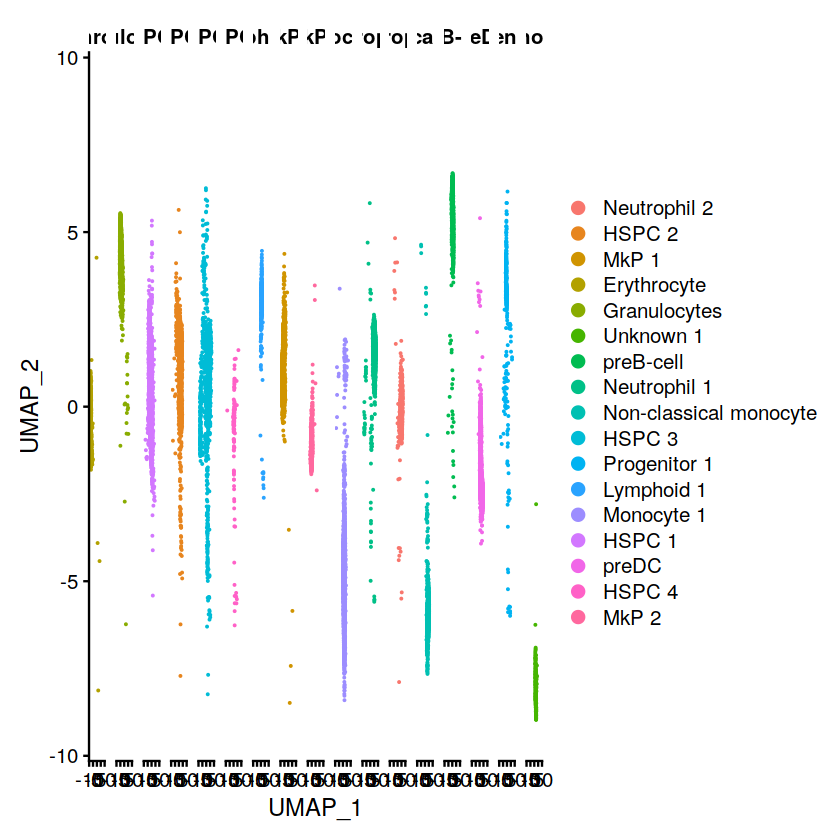

In [13]:
## plot with labels
Idents(se) <- se$cluster_labels
coord = max(max(Embeddings(se[["umap"]])), abs(min(Embeddings(se[["umap"]]))))
DimPlot(se, split.by="cluster_labels") + 
    xlim(-1*coord-0.01,coord+0.01) +
    ylim(-1*coord-0.01,coord+0.01) 

ggsave(file.path(outdir, "umap_cluster_labels_split.pdf"), width=24, height=8,units='in' )

In [14]:
if(is_rds){
    saveRDS(se, file.path(dirname(se_f), "allSamples.integrated.group.rds"))
}

In [15]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/isaac/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Signac_1.4.0       ggplot2_3.3.6      sp_1.4-7           SeuratObject_4.1.0
[5] Seurat_4.1.0      

loaded via a namespace (and not attached):
  [1] uuid_1.1-0             fastmatch_1.1-3        plyr_1.8.7            
  [4] igraph_1.3.1           repr_1.1.4             lazyeval_0.2.2        
  [7] s